In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the training data
train_data = pd.read_csv('data/train.csv')

# Explore the data
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


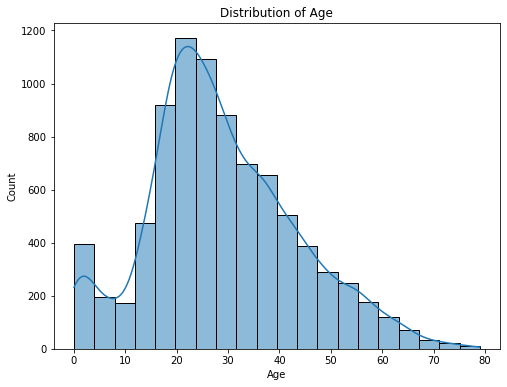

In [5]:

# Data Visualization
# Example: Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [6]:
# Handle missing values
train_data.isnull().sum()  # Check the count of missing values in each column
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)  # Replace missing values in 'Age' with the mean




In [7]:
# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['HomePlanet', 'Cabin', 'Destination'])  # One-hot encode categorical columns



In [8]:
# Scale numerical features (optional)
scaler = MinMaxScaler()
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

# Split the data into features (X) and target variable (y)
X = train_data.drop(['PassengerId', 'Transported', 'Name'], axis=1)
y = train_data['Transported']

# Now you can proceed with feature engineering, model selection, and further steps in your analysis.

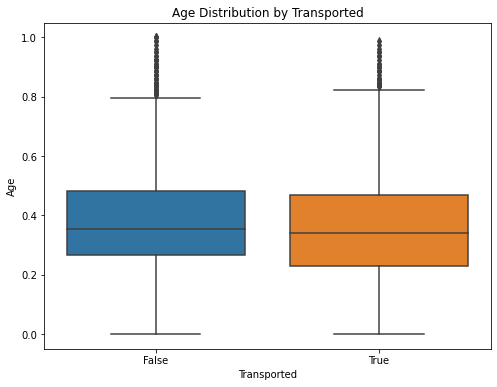

In [9]:

# Further Data Analysis
# Example: Boxplot of Age by Transported
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_data['Transported'], y=train_data['Age'])
plt.xlabel('Transported')
plt.ylabel('Age')
plt.title('Age Distribution by Transported')
plt.show()



In [10]:
X.head()

/usr/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/lib/python3.11/site-packages/IPython/core/formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/0/P,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/2/S,Cabin_T/3/P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,...,0,0,0,0,0,0,0,0,0,1
1,False,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,1,0,...,0,0,0,0,0,0,0,0,0,1
2,False,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,0,1,...,0,0,0,0,0,0,0,0,0,1
3,False,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,0,1,...,0,0,0,0,0,0,0,0,0,1
4,False,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,1,0,...,0,0,0,0,0,0,0,0,0,1
